# Proyecto: Análisis de mercado inmobiliario

El objetivo de este proyecto es reproducir los pasos que haría un/a Data Scientist cuando se enfrenta a una problemática real. Por eso, consta de tres secciones:
* En la Parte 1, te presentamos la problemática sobre la cual vas a trabajar. En esta sección deberás decidir qué datos te ayudarán a trabajar en este problema y dónde puedes conseguirlos.
* En la Parte 2 te proveemos de un dataset para abordar la problemática planteada. Deberás realizar un Análisis Exploratorio de Datos sobre este dataset.
* En la Parte 3, deberás utilizar herramientas de Machine Learning para predecir la variable de interés.


En este proyecto vas a trabajar con un dataset de propiedades en venta publicado en el portal [Properati](www.properati.com.ar).


## Problema

Recientemente te has incorporado al equipo de Datos de una gran inmobiliaria. La primera tarea que se te asigna es ayudar a los tasadores/as a valuar las propiedades, ya que es un proceso difícil y, a veces, subjetivo. Para ello, propones crear un modelo de Machine Learning que, dadas ciertas características de la propiedad, prediga su precio de venta.

## 1. Pensando como un Cientifico de Datos.

### ¿Qué datos crees que te ayudarían a trabajar en el problema?¿Por qué?

Los datos que me parecen mas importante, para poder estimar correctamente el precio del inmuble son  la ubicacion (l3), la superficie total (surficie_total) y Superficie Cubierta(surface_covered). Otro dato que sería importante es el estado actual del inmueble. 

## 2. Análisis Exploratorio de Datos

En esta sección, debes realizar un Análisis Exploratorio de Datos sobre el dataset de propiedades de Properati. Es importante que respondas las siguientes preguntas durante el análisis:

* ¿Qué tamaño tiene el dataset?¿Cuántas instancias y cuántas columnas?
* ¿Cuántos valores faltantes hay en cada columna?
* ¿Cómo es la distribución de cada variable? Deberás hacer histogramas para las variables numéricas y gráficos de barras para las variables categóricas.
* ¿Cómo se relacionan las variables entre sí?¿Qué tipo de gráfico será conveniente para presentar esta información?
* ¿Cómo están correlacionadas las variables numéricas?¿Qué tipo de gráfico será conveniente para presentar esta información?¿Cuáles serán los mejores predictores de la variable de interés?

Vas a encontrar instrucciones para responder estas preguntas. Es importante aclarar que estas instrucciones corresponden al **mínimo entregable** que esperamos en la consigna.

**Comentarios sobre el dataset** 
1. Nosotros ya hicimos un *curado* sobre el dataset que puedes descargar directamente de la página de Properati. Muchos de los pasos que hicimos para curar el conjunto de datos los veremos durante el Bloque 2 de la carrera.

2. Si tienes dudas sobre qué representa alguna de las columnas, puedes consultar [aquí](https://www.properati.com.ar/data/). Notarás que algunas columnas fueron descartadas.

3. `Capital Federal` refiere a la Ciudad de Buenos Aires. `Bs.As. G.B.A. Zona Norte`, `Bs.As. G.B.A. Zona Sur` y `Bs.As. G.B.A. Zona Oeste` son regiones que conforman el [Gran Buenos Aires](https://es.wikipedia.org/wiki/Gran_Buenos_Aires), un conjunto de ciudades que rodean a la Ciudad de Buenos Aires.



In [20]:
# 1 Importar liberias utiles
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [21]:
# %load lib/utils.py
class utils:
    @staticmethod
    def open_csv(path):
        return pd.read_csv(path)

    @staticmethod
    def graph_by_property_value(property_name, property_value, order_array, ax1,ax2):
        a = sns.countplot(data = dataset[dataset.l2 == property_value],y=property_name, palette="Set3",ax=ax[ax1,ax2], order=order_array)
        a.set_title(property_value)
    
    @staticmethod
    def split(features,obj,test_size):
        X_train, X_test, Y_train, Y_test = train_test_split(features, obj, 
                                                            test_size=test_size, 
                                                            random_state=42)
        return X_train, X_test, Y_train, Y_test
    
    @staticmethod
    def rmse_graph(model, X_train, X_test, Y_train, Y_test):
        Y_train_pred = model.predict(X_train)
        Y_test_pred = model.predict(X_test)
        
        rmse_train = np.sqrt(mean_squared_error(Y_train, Y_train_pred))
        rmse_test = np.sqrt(mean_squared_error(Y_test, Y_test_pred))
        
        print(f'Err Train: {rmse_train}')
        print(f'Err Test: {rmse_test}')

        plt.figure(figsize = (10,4))
        
        sns.distplot(Y_train - Y_train_pred, bins = 20, label = 'train')
        sns.distplot(Y_test - Y_test_pred, bins = 20, label = 'test')
        
        plt.xlabel('Errores')
        plt.legend()

    
    @staticmethod
    def decision_tree(title, depths, X_train, X_test, Y_train, Y_test):
        #Define error list
        err_train = []
        err_test = []
        for depth in depths:
            
            #Define DesitionTreeRegresson and fit it
            a = DecisionTreeRegressor(max_depth = depth, random_state = 42)
            a.fit(X_train, Y_train)
            
            #try
            Y_train_pred = a.predict(X_train)
            train_err = np.sqrt(mean_squared_error(Y_train, Y_train_pred))
            
            Y_test_pred = a.predict(X_test)
            test_err = np.sqrt(mean_squared_error(Y_test, Y_test_pred))

            #save the error
            err_train.append(train_err)
            err_test.append(test_err)
         
        plt.plot(depths, err_train,'o-',label='train' )
        plt.plot(depths, err_test, 'o-',label='test')
        plt.legend()
        plt.title(title)
        plt.xlabel('depths')
        plt.ylabel('error')
    

    @staticmethod
    def knn(titulo, k_vecinos, X_train, X_test, y_train, y_test):
        # Definimos las listas vacias para los valores de error deseados
        lista_error_train = []
        lista_error_test = []

        for k in k_vecinos:
            # Definir el modelo con el valor de vecinos deseado
            clf = KNeighborsRegressor(n_neighbors= k)

            # Entrenar el modelo
            clf.fit(X_train, y_train)

            # Predecir y evaluar sobre el set de entrenamiento
            y_train_pred = clf.predict(X_train)
            train_err = np.sqrt(mean_squared_error(y_train, y_train_pred))

            # Predecir y evaluar sobre el set de evaluación
            y_test_pred = clf.predict(X_test)
            test_err = np.sqrt(mean_squared_error(y_test, y_test_pred))

            # Agregar la información a las listas
            lista_error_train.append(train_err)
            lista_error_test.append(test_err)

        plt.plot(k_vecinos, lista_error_train,'o-',label='train' )
        plt.plot(k_vecinos, lista_error_test, 'o-',label='test')
        plt.legend()
        plt.title(titulo)
        plt.xlabel('k_vecinos')
        plt.ylabel('error')
        plt.ylabel('error')

1. Carga el dataset usando las funcionalidades de Pandas. Imprimir cuántas filas y columnas tiene, y sus cinco primeras instancias.

In [23]:
# 2. Cargar dataset
path = "Datasets/DS_Proyecto_01_Datos_Properati.csv"
dataset = utils.open_csv(path)
dataset.head(5)

#Como el dataset excede el tamaño permitido por github, el repositorio contiene una archivo .rar.
#Antes de correr esta linea, descomprima el archivo en la misma ubicacion (Carpeta Datasets).

,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
0,2019-10-17,2019-12-23,2019-10-17,-34.605880,-58.384949,Argentina,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,USD,"***Venta semipiso centro, ideal hostel*****",DESCRIPCION DE LA PROPIEDAD: Departamento de 1...,Departamento,Venta
1,2019-10-17,2019-11-21,2019-10-17,-34.624056,-58.412110,Argentina,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,USD,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH,Venta
2,2019-10-17,2019-11-01,2019-10-17,-34.593569,-58.427474,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Pal...,"2 ambienets amplio , excelente estado , patio ...",PH,Venta
3,2019-10-17,2019-12-23,2019-10-17,-34.581294,-58.436754,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,USD,COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...,HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...,PH,Venta
4,2019-10-17,2020-03-11,2019-10-17,-34.914194,-57.938219,Argentina,Bs.As. G.B.A. Zona Sur,La Plata,2.0,1.0,1.0,50.0,35.0,40000.0,USD,58 entre 1 y 2 Venta de departamento en ph.1 ...,58 entre 1 y 2 Venta de departamento en PH. P...,PH,Venta


In [24]:
# 3.Limpiar Dataset

#¿Cuántos tipos de propiedad hay publicados según este dataset?
dataset.shape[1]

#¿Cuántos instancias por cada tipo de propiedad hay en el dataset?
dataset.count()

#Limpiamos el dataset, eliminamos aquellas columnas que no aporten datos significativos para nuestro analisis.
dataset.drop(['l1', 'start_date', 'end_date', 'created_on', 'lat', 'lon', 'title', 'currency','description','operation_type'], 'columns', inplace = True )

# Vemos cuantos nulls hay en cada columna
dataset.isna().sum()

l2                     0
l3                     0
rooms                  0
bedrooms               0
bathrooms           5957
surface_total      20527
surface_covered    21614
price                  0
property_type          0
dtype: int64

In [25]:
# Asignamos valores para completar los datos nulos.

# Para baños tomamos la moda
bathroom_mode = dataset["bathrooms"].mode()[0]
dataset["bathrooms"].fillna(bathroom_mode, inplace = True)


# Para superficie Total, tomamos la cubierta, en caso de ser null tambien, asignamos la moda.
surface_covered_mode = dataset["surface_covered"].mode()[0]
surface_total_mode = dataset["surface_total"].mode()[0]

dataset["surface_covered"].fillna(surface_covered_mode, inplace = True)
dataset["surface_total"].fillna(surface_total_mode, inplace = True)

# Vemos cuantos nulls hay en cada columna
print(dataset.isna().sum())

l2                 0
l3                 0
rooms              0
bedrooms           0
bathrooms          0
surface_total      0
surface_covered    0
price              0
property_type      0
dtype: int64


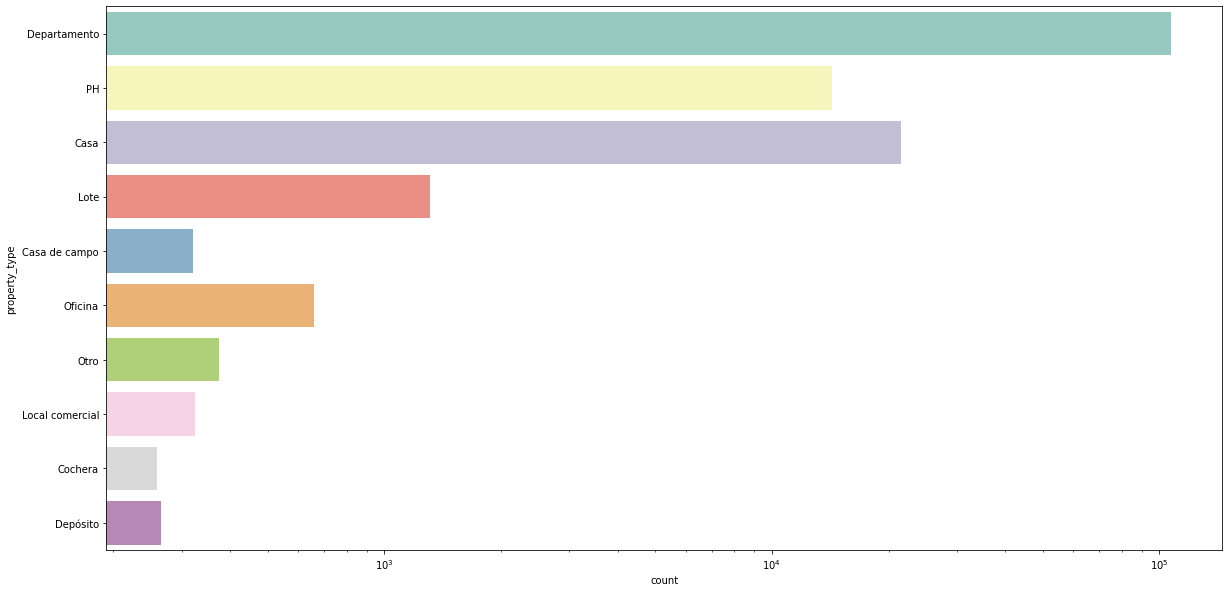

In [26]:
# Vemos cantidad de registros por tipo de propiedad
# print(dataset["property_type"].value_counts())
# 4.1 Localizacion
fig, ax = plt.subplots(figsize=(20, 10))
a = sns.countplot(y = "property_type", data=dataset, palette="Set3")
a.set_xscale("log")


### ¿De qué regiones son las publicaciones? Los siguientes gráficos de barras muestran las variables `l2` y `l3`.

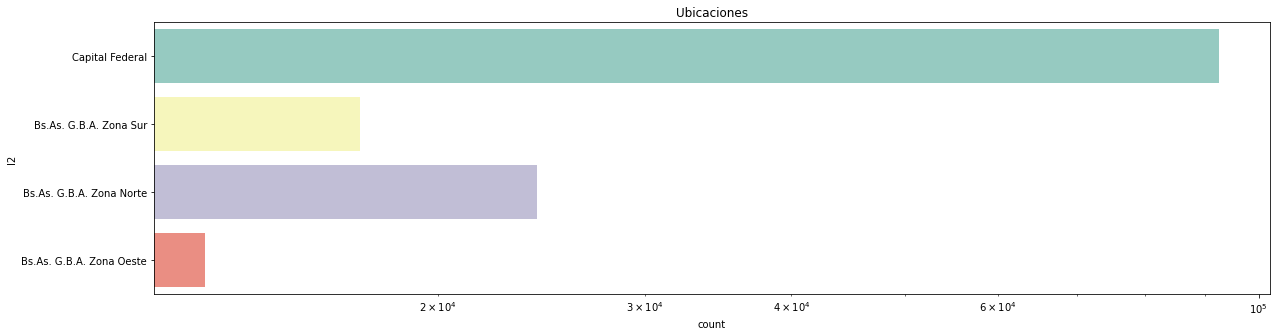

In [27]:
# 4.1 Localizacion
fig, ax = plt.subplots(figsize=(20, 5))

a = sns.countplot(data= dataset, y="l2", palette="Set3")
a.set_title('Ubicaciones')
a.set_xscale("log")

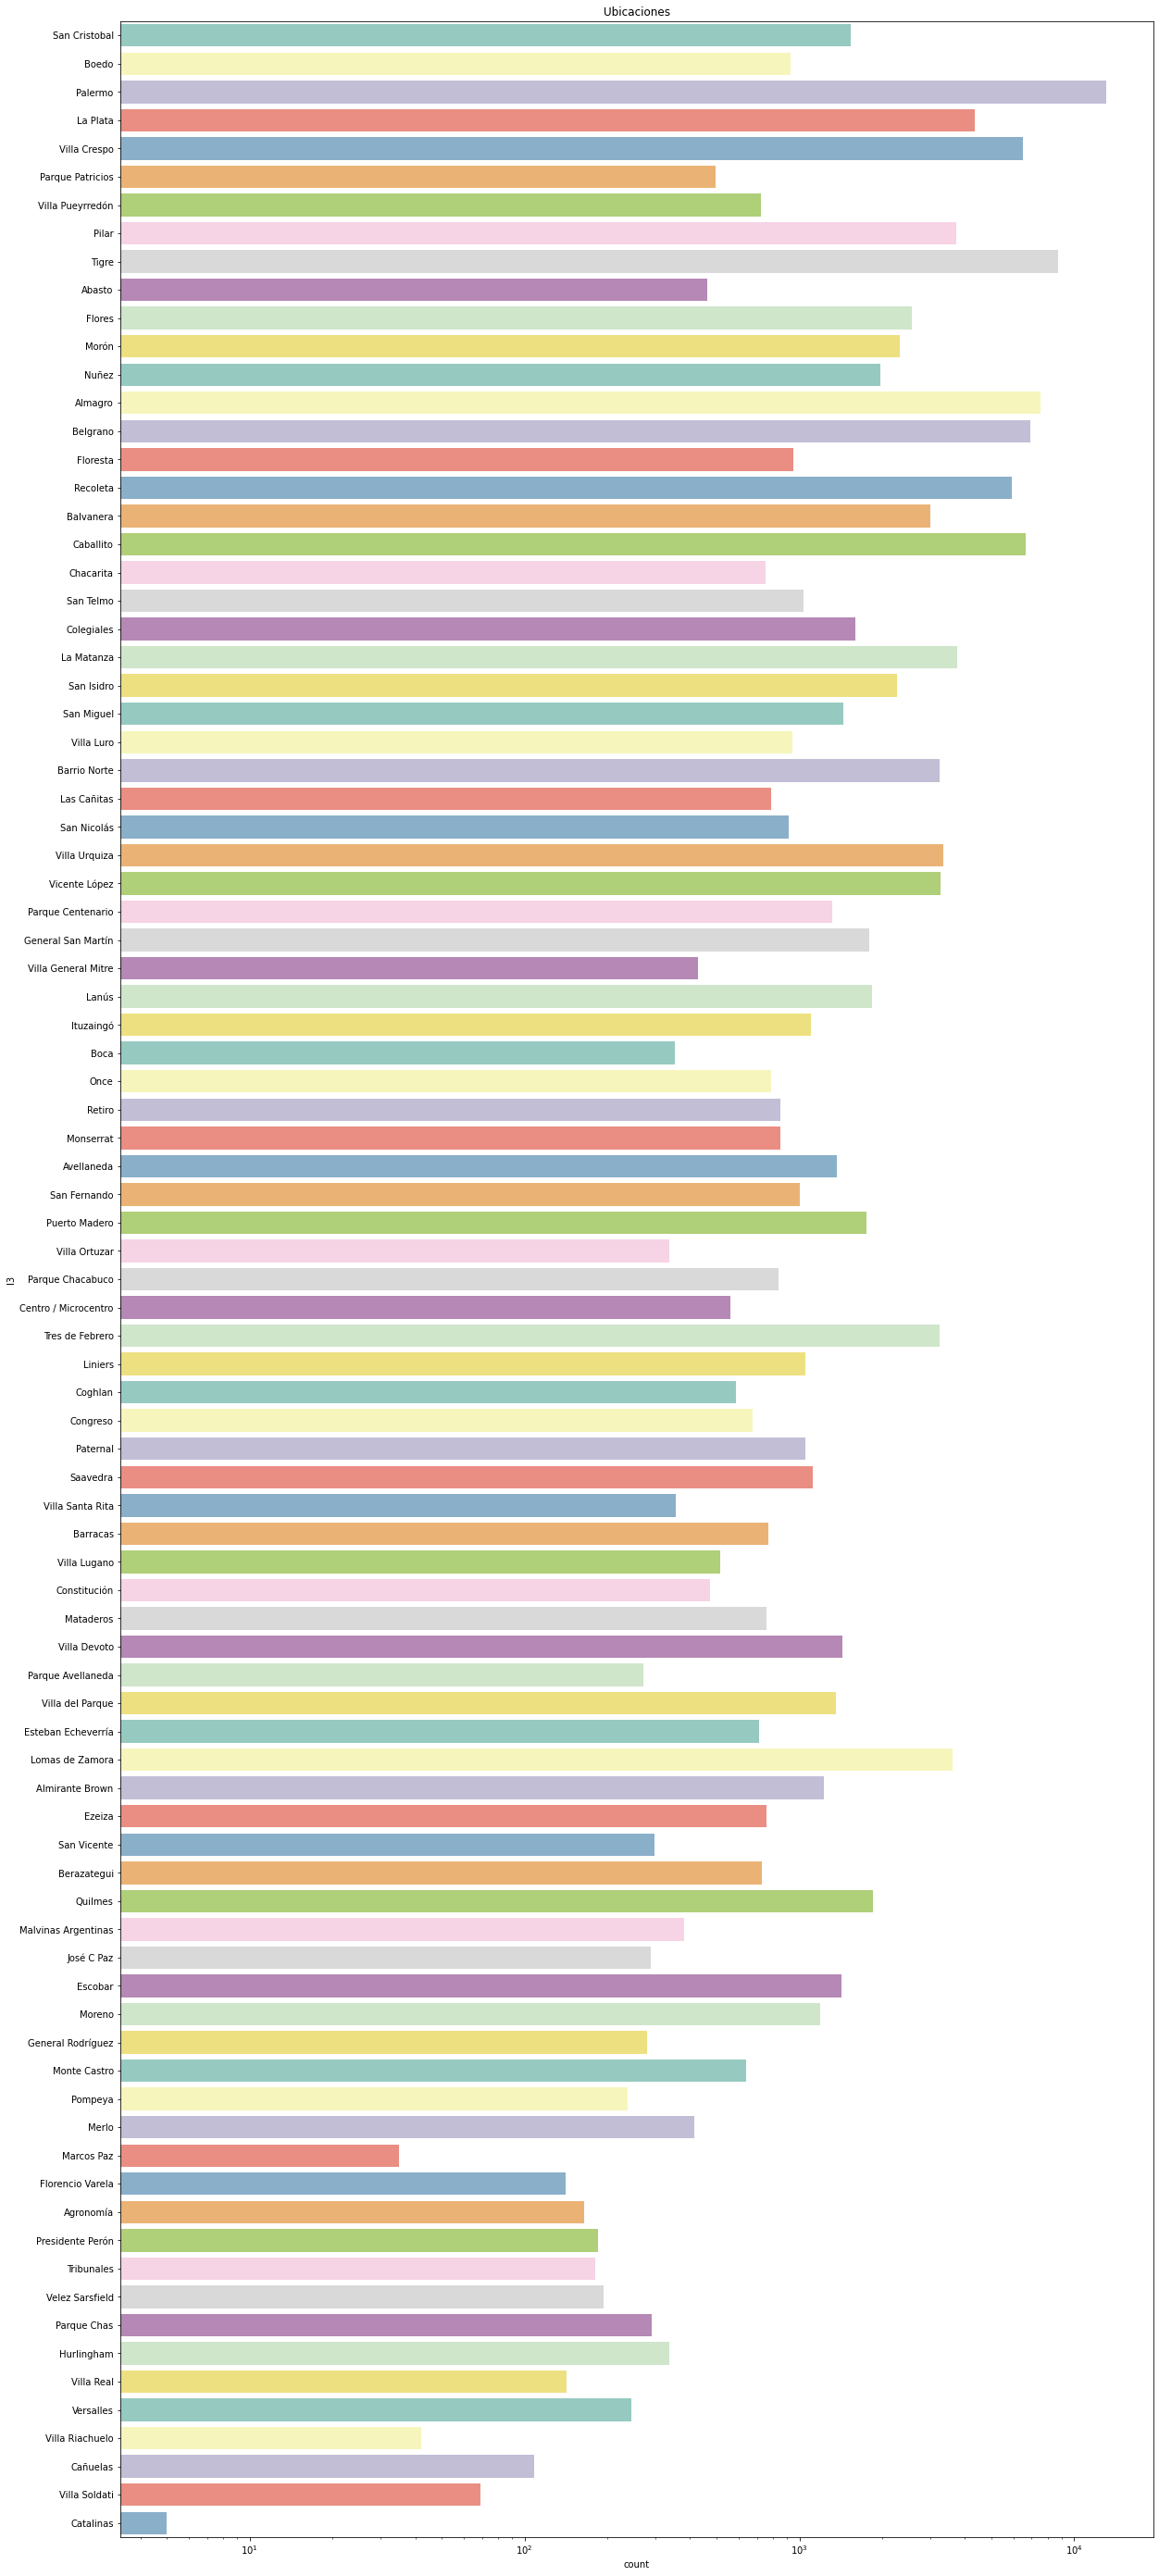

In [28]:
# 4.1 Localizacion
fig, ax = plt.subplots(figsize=(20, 50))

a = sns.countplot(data= dataset, y="l3", palette="Set3")
a.set_title('Ubicaciones')
a.set_xscale("log")

#### Pregunta: Como es la relación cantidad de cocheras - Departamentos? Es suficiente? Los edificios por lo general se construyen con Cochera?

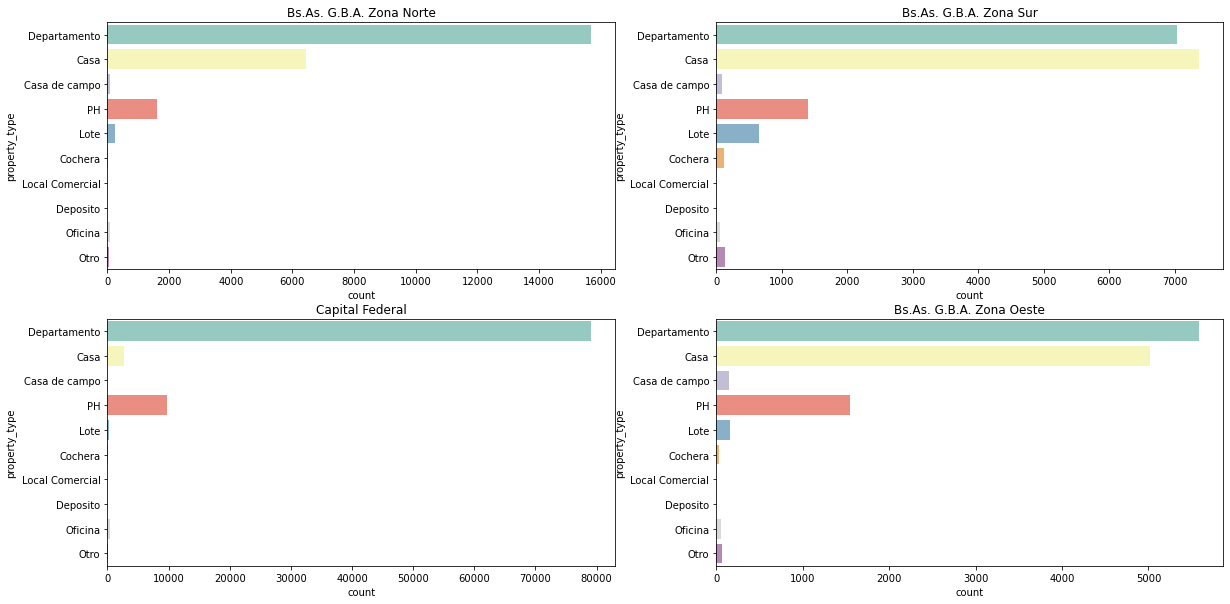

In [29]:
# 4.3 Tipos de propiedades en cada ubicacion
fig, ax = plt.subplots(2,2, figsize=(20, 10))
order = ['Departamento', 'Casa', 'Casa de campo', 'PH', 'Lote','Cochera','Local Comercial','Deposito','Oficina','Otro']

utils.graph_by_property_value("property_type", "Bs.As. G.B.A. Zona Norte", order, 0,0)
utils.graph_by_property_value("property_type", "Bs.As. G.B.A. Zona Sur", order, 0,1)
utils.graph_by_property_value("property_type", "Capital Federal", order, 1,0)
utils.graph_by_property_value("property_type", "Bs.As. G.B.A. Zona Oeste", order, 1,1)



#### Anotación: Podemos observar cierta similitud entre Zona sur y Zona oesta. En Zona norte y Capital Federal disminuyen notablemente las casas. Los PH y los departamentos se mantienen.

Seleccionamos las tres clases más abundantes de tipos de propiedad y la región con más propiedades publicadas.

In [30]:
# Seleccionar las tres clases de propiedad mas frecuentes.

#Conditions: 
dataset_region_mas_publicada = dataset[dataset["l2"]=="Capital Federal"]

a = dataset_region_mas_publicada["property_type"].value_counts().index[0]
b = dataset_region_mas_publicada["property_type"].value_counts().index[1]
c = dataset_region_mas_publicada["property_type"].value_counts().index[2]


dataset_filtered = dataset_region_mas_publicada[(dataset_region_mas_publicada["property_type"] == a) |
                                                (dataset_region_mas_publicada["property_type"] == b) |
                                                (dataset_region_mas_publicada["property_type"] == c)
                                               ]
dataset_filtered.shape


(91485, 9)

**Checkpoint:** deberías tener un dataset con 91485 instacias, 19 columnas.

6. **Distribuciones y relaciones de a pares:** Estudia la distribución y las relaciones de a pares de las variables `rooms`, `bedrooms`, `bathrooms`, `surface_total`, `surface_covered`, `price` para cada tipo de propiedad. Para ello, ten en cuenta:
    1. Obtiene estadísticos que te sirvan para tener una primera idea de los valores que abarcan estas variables. ¿Cuáles crees que toman valores que tal vez no tengan mucho sentido?
    1. Algunas instancias tienen valores de superficie (`surface_total`) muy grandes y dificultan la correcta visualización. Estudia la distribución de esa variable y filtra por un valor razonable que te permita obtener gráficos comprensibles. Puede ser útil un boxplot para determinar un rango razonable.
    1. Lo mismo ocurre con valores de superficie total muy chico.
    1. Las propiedades no pueden tener `surface_covered` mayor a `surface_total`. Si eso sucede, debes filtrar esas instancias.
    1. El rango de precios que toman las propiedades es muy amplio. Estudia la distribución de esa variable y filtra por un valor razonable que te permita obtener gráficos comprensibles. Puede ser útil un boxplot para determinar un rango razonable.
    1. Una vez filtrado el dataset, puedes utilizar la función `pairplot` de Seaborn.

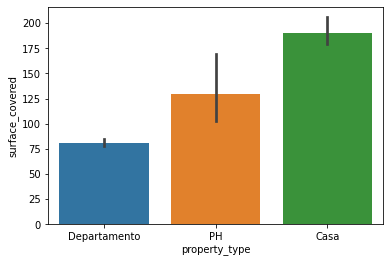

In [31]:
sns.barplot(data=dataset_filtered, x="property_type", y="surface_covered")

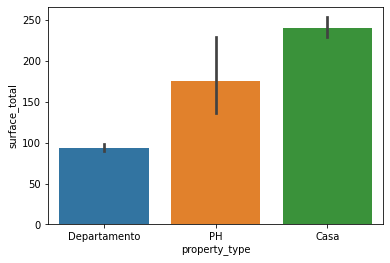

In [32]:
sns.barplot(data=dataset_filtered, x="property_type", y="surface_total")

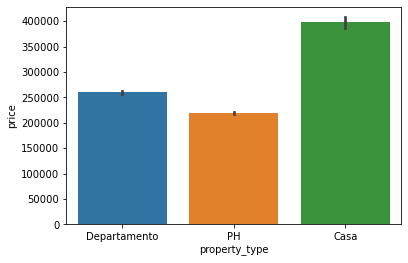

In [33]:
sns.barplot(data=dataset_filtered, x="property_type", y="price")

7. **Correlaciones:** Estudia la correlación entre las variables `rooms`, `bedrooms`, `bathrooms`, `surface_total`, `surface_covered`, `price`. ¿Cuáles son las mejores variables para predecir el precio?¿Qué diferencias encuentras según cada tipo de propiedad?

Total: 107326
Filtrado: 94811
Se filta el 11.660734584350479% de los datos que corresponden a departamentos


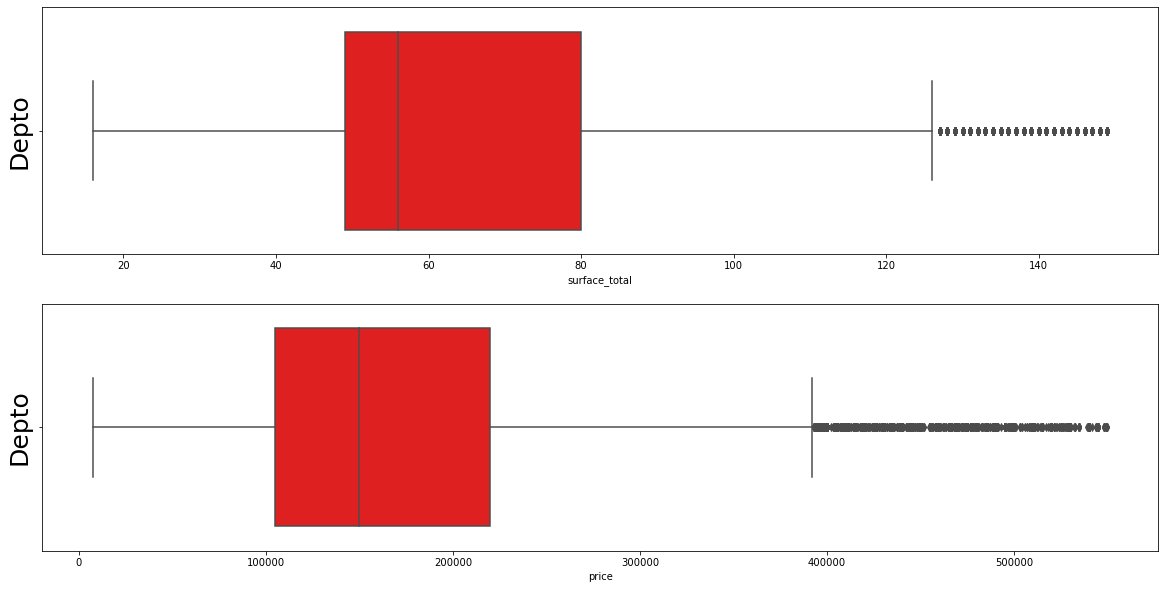

In [34]:
plt.figure(figsize=(20, 10))

dpto_mask = ((dataset['surface_total'] >= dataset['surface_covered']) & 
                        (dataset['surface_total'] < 150) & 
                        (dataset['surface_total'] > 15) & 
                        (dataset['price'] < 550000) &
                        (dataset['property_type'] == 'Departamento'))
plt.subplot(2,1,1)
sns.boxplot(data = dataset[dpto_mask], x = 'surface_total', color = 'r')
plt.ylabel('Depto', size = 25)

plt.subplot(2,1,2)
sns.boxplot(data = dataset[dpto_mask], x = 'price', color = 'r')
plt.ylabel('Depto', size = 25)

#Haciendo este filtro, eliminamos x instancias. Chequear si el volumen afecta al total.
print("Total: " + str(dataset[dataset['property_type'] == 'Departamento'].shape[0]))
print("Filtrado: " + str(dataset[dpto_mask].shape[0]))
porcentaje_filtrado = (dataset[dpto_mask].shape[0]* 100) / dataset[dataset['property_type'] == 'Departamento'].shape[0]
print("Se filta el " + str(100-porcentaje_filtrado) + "% de los datos que corresponden a departamentos")

Total: 14298
Filtrado: 94811
Se filta el 11.660734584350479% de los datos que corresponden a departamentos


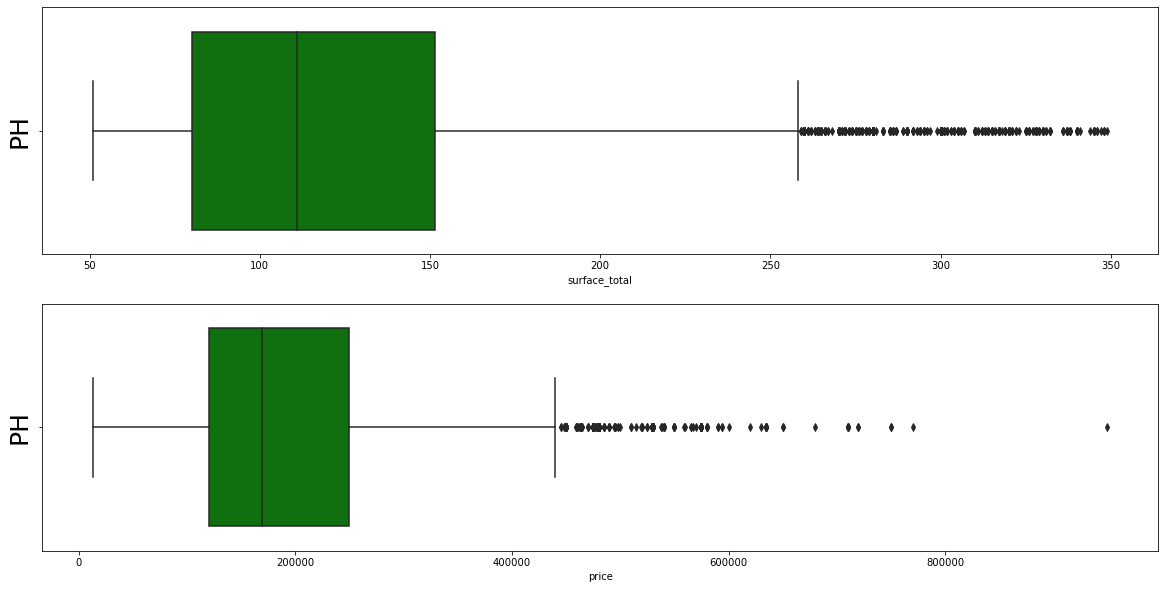

In [35]:
plt.figure(figsize=(20, 10))

ph_mask = ((dataset['surface_total'] >= dataset['surface_covered']) & 
                        (dataset['surface_total'] < 350) & 
                        (dataset['surface_total'] > 50) & 
                        (dataset['price'] < 1550000) &
                        (dataset['property_type'] == 'PH'))

plt.subplot(2,1,1)
sns.boxplot(data = dataset[ph_mask], x = 'surface_total', color = 'g')
plt.ylabel('PH', size = 25)

plt.subplot(2,1,2)
sns.boxplot(data = dataset[ph_mask], x = 'price', color = 'g')
plt.ylabel('PH', size = 25)

#Haciendo este filtro, eliminamos x instancias. Chequear si el volumen afecta al total.
print("Total: " + str(dataset[dataset['property_type'] == 'PH'].shape[0]))
print("Filtrado: " + str(dataset[dpto_mask].shape[0]))
porcentaje_filtrado = (dataset[dpto_mask].shape[0]* 100) / dataset[dataset['property_type'] == 'Departamento'].shape[0]
print("Se filta el " + str(100-porcentaje_filtrado) + "% de los datos que corresponden a departamentos")

Total: 21521
Filtrado: 17658
Se filta el 17.949909390827557% de los datos que corresponden a departamentos


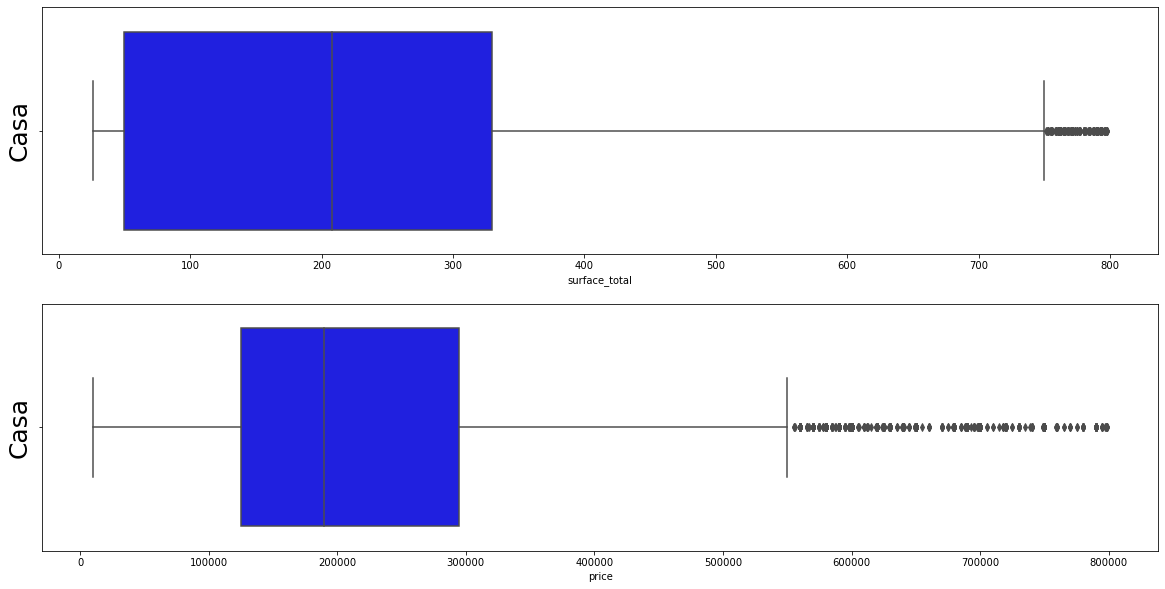

In [36]:
plt.figure(figsize=(20, 10))

casa_mask = ((dataset['surface_total'] >= dataset['surface_covered']) & 
                        (dataset['surface_total'] < 800) & 
                        (dataset['surface_total'] > 25) & 
                        (dataset['price'] < 800000) &
                        (dataset['property_type'] == 'Casa'))

plt.subplot(2,1,1)
sns.boxplot(data = dataset[casa_mask], x = 'surface_total', color = 'b')
plt.ylabel('Casa', size = 25)

plt.subplot(2,1,2)
sns.boxplot(data = dataset[casa_mask], x = 'price', color = 'b')
plt.ylabel('Casa', size = 25)

#Haciendo este filtro, eliminamos x instancias. Chequear si el volumen afecta al total.
print("Total: " + str(dataset[dataset['property_type'] == 'Casa'].shape[0]))
print("Filtrado: " + str(dataset[casa_mask].shape[0]))
porcentaje_filtrado = (dataset[casa_mask].shape[0]* 100) / dataset[dataset['property_type'] == 'Casa'].shape[0]
print("Se filta el " + str(100-porcentaje_filtrado) + "% de los datos que corresponden a departamentos")

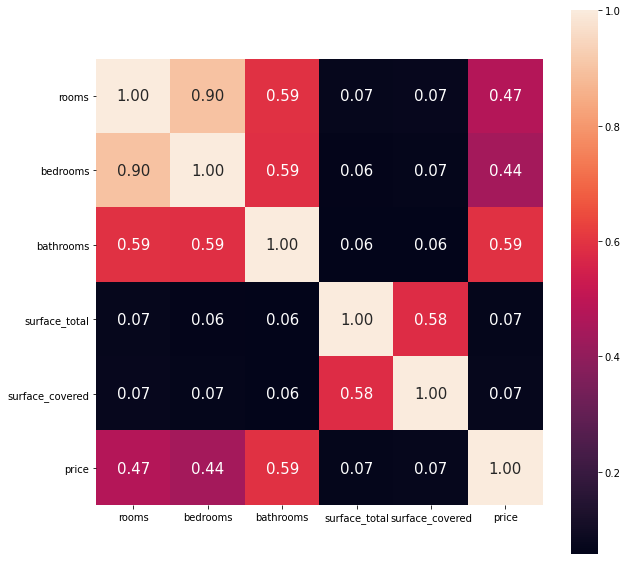

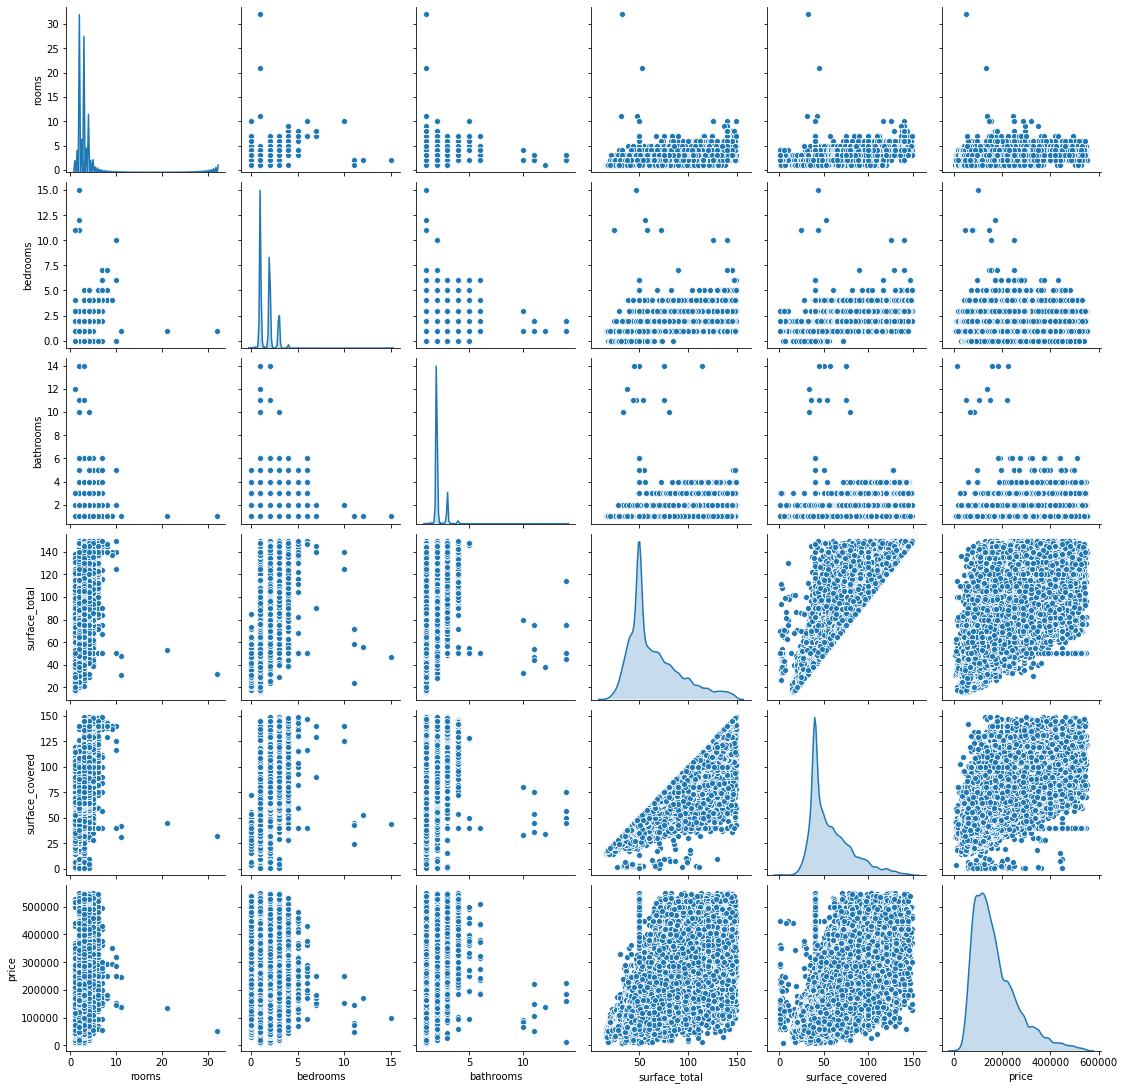

In [37]:
# Correlaciones
plt.figure(figsize=(10,10))
corr_dpto = dataset[dataset["property_type"] == "Departamento"].corr()
sns.heatmap(corr_dpto, cbar = True, square = True, annot = True, fmt= ".2f", annot_kws = {"size":15})
sns.pairplot(data = dataset[dpto_mask], diag_kind = 'kde')


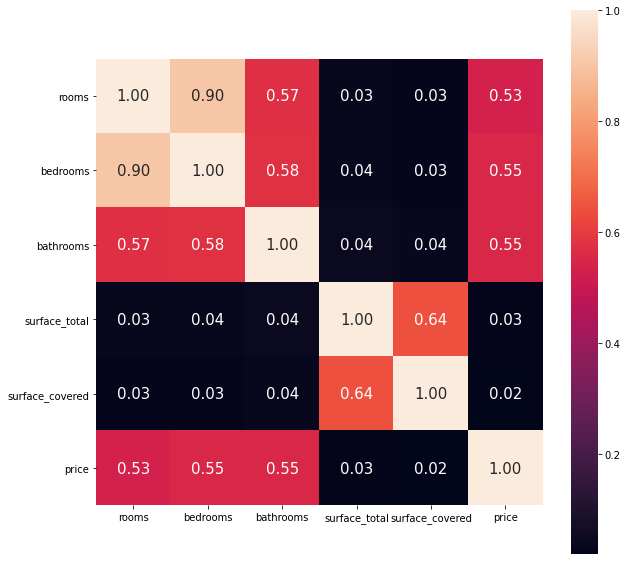

In [38]:
# Correlaciones
plt.figure(figsize=(10,10))
corr_ph = dataset[dataset["property_type"] == "PH"].corr()
sns.heatmap(corr_ph, cbar = True, square = True, annot = True, fmt= ".2f", annot_kws = {"size":15})

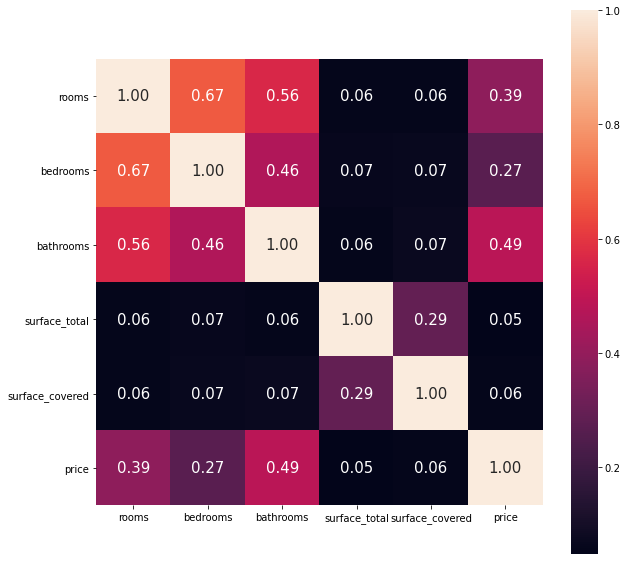

In [39]:
# Correlaciones
plt.figure(figsize=(10,10))
corr_casa = dataset[dataset["property_type"] == "Casa"].corr()
sns.heatmap(corr_casa, cbar = True, square = True, annot = True, fmt= ".2f", annot_kws = {"size":15})


En los graficos podemos ver que las relaciones mas determinantes son:
    1. price - surface_total
    2. price - surface_covered
    podriamos conciderar solo una de estas dos, dado que la relacion surface_covered - surface_total no tiene demasiada fuerza.
    3. surface_covered o surface_total - rooms o bethrooms.

In [40]:
# dataset_filtered["bathrooms"].value_counts(ascending=True)
# sns.barplot(data=dataset_filtered, x="bathrooms", y="price")

### 3. Machine Learning

En esta sección, debes entrenar dos modelos de Machine Learning - uno de vecinos más cercanos y otro de árboles de decisión -  para predecir el precio de las propiedades tipo `Departamento`, `PH` y `Casa`  en la Ciudad Autónoma de Buenos Aires (`Capital Federal`). Para ello, no debes olvidarte de:

* Elegir una métrica apropiada para evaluar los resultados de los modelos.
* Seleccionar las variables predictoras (`X`) y la variable a predecir (`y`). 
* Realizar un Train/Test split de los datos.
* Generar un modelo *benchmark* y evaluarlo.
* Entrenar un modelo de vecinos más cercanos y un modelo de árbol de decisión con hiperparámetros iniciales de su elección.
* Evaluar los modelos obtenidos. Para ello, evalúa la métrica elegida en el conjunto de Test y en el conjunto de Train. También, realiza gráficos de valores reales vs. valores predichos.
* Mejorar el desempeño de sus modelos optimizando el número de vecinos y la profundidad del árbol, respectivamente.
* Entre los modelos entrenados, ¿cuál elegirías para utilizar?¿Por qué? 
* Ser **crítico/a** con la metodología utilizada. Por ejemplo, responde las siguientes preguntas: ¿Qué información no estás usando que podría ayudar al modelo?¿Qué información puede estar demás o repetida?

Estos lineamientos corresponden al **mínimo entregable** de esta sección.


**Importante:** para asegurarnos que trabajes con un dataset apropiados, debes volver a cargar los datos y realizar el siguiente filtrado:

1. Selecciona aquellas propiedades en Capital Federal y cuyo tipo de propiedad es Departamento, PH o Casa.
1. Selecciona aquellas propiedades cuya superficie total es menor a 1000 m2 y mayor a 15 m2.
1. Selecciona aquellas propiedades cuya precio es menor 4000000 dólares.
1. Selecciona las columnas `rooms`, `bedrooms`, `bathrooms`, `surface_total`, `surface_covered` y `price`.
1. Descarta aquellas instacias con valores faltantes.

**Checkpoint:** deberías obtener un dataset con 81019 instacias y 6 columnas.

### Error elegido: RMSE

In [41]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [42]:
ds = dataset

#Definimos las features que vamos a utilizar y la variable que queres predecir

casa_X = ds[casa_mask][['rooms', 'surface_covered','bathrooms', 'surface_total', 'bedrooms']]
casa_Y = ds[casa_mask]['price']

ph_X = ds[ph_mask][['rooms', 'surface_covered','bathrooms', 'surface_total', 'bedrooms']]
ph_Y = ds[ph_mask]['price']

dpto_X = ds[dpto_mask][['rooms', 'surface_covered','bathrooms', 'surface_total', 'bedrooms']]
dpto_Y = ds[dpto_mask]['price']


In [43]:
X_train_casa, X_test_casa, Y_train_casa, Y_test_casa = utils.split(casa_X, casa_Y, 0.30)

X_train_ph, X_test_ph, Y_train_ph, Y_test_ph = utils.split(ph_X, ph_Y, 0.30)

X_train_dpto, X_test_dpto, Y_train_dpto, Y_test_dpto = utils.split(dpto_X, dpto_Y, 0.30)



## Regresion lineal

In [44]:
#Lineal Regression
regresor_linear_casa = LinearRegression()
regresor_linear_ph = LinearRegression()
regresor_linear_dpto = LinearRegression()

regresor_linear_casa.fit(X_train_casa, Y_train_casa)
regresor_linear_dpto.fit(X_train_dpto, Y_train_dpto)
regresor_linear_ph.fit(X_train_ph, Y_train_ph)


LinearRegression()

Err Train: 114168.77654010126
Err Test: 114668.42988261528


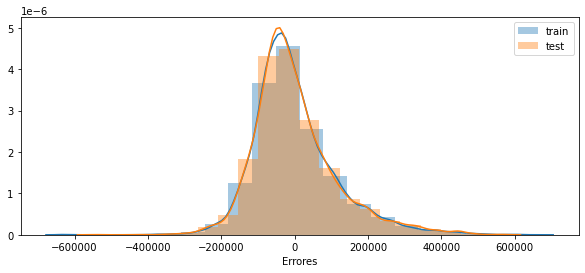

In [45]:
utils.rmse_graph(regresor_linear_casa, X_train_casa, 
                         X_test_casa, Y_train_casa, Y_test_casa)

Err Train: 61146.63735636219
Err Test: 61697.07751226521


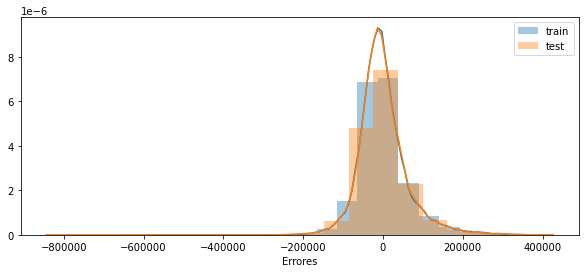

In [46]:
utils.rmse_graph(regresor_linear_dpto, X_train_dpto,
                         X_test_dpto, Y_train_dpto, Y_test_dpto)

Err Train: 75775.53673985376
Err Test: 77565.39449217629


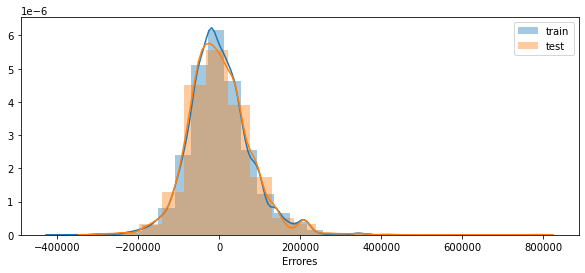

In [47]:
utils.rmse_graph(regresor_linear_ph, X_train_ph,
                         X_test_ph, Y_train_ph, Y_test_ph)

### El modelo de regresion lineal predice mejor Casas y Departamentos

## Vecinos mas cercanos

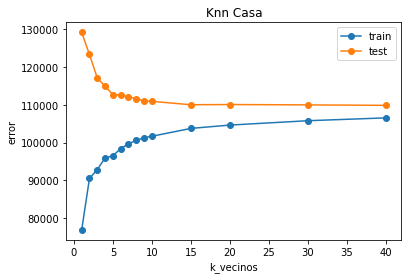

In [59]:
knn_quantity = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 30, 40]

# Casa
utils.knn('Knn Casa', knn_quantity, X_train_casa, X_test_casa, Y_train_casa, Y_test_casa)

Para Knn en Casa la cantidad de vecinos que mejor funciona es 10

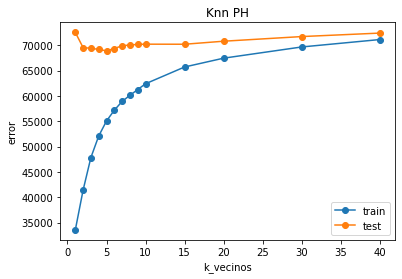

In [60]:
knn_quantity = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 30, 40]

# PH
utils.knn('Knn PH', knn_quantity, X_train_ph, X_test_ph, Y_train_ph, Y_test_ph)

Para Knn en PH la cantidad de vecinos que mejor funciona es 15

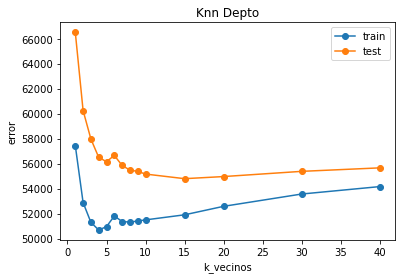

In [61]:
knn_quantity = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 30, 40]

# Casa
utils.knn('Knn Depto', knn_quantity, X_train_dpto, X_test_dpto, Y_train_dpto, Y_test_dpto)

Para Knn en Departamentos la cantidad de vecinos que mejor funciona es 12

## Arboles de decision 

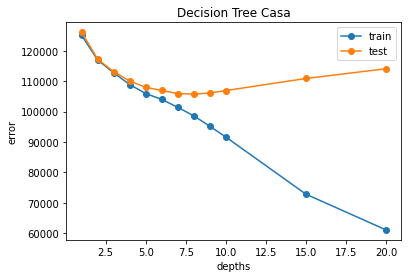

In [63]:
# Casa
knn_quantity = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20]
utils.decision_tree('Decision Tree Casa', knn_quantity, X_train_casa, X_test_casa, Y_train_casa, Y_test_casa)

Para Casas, la mejor profundidad para predecir es 7.

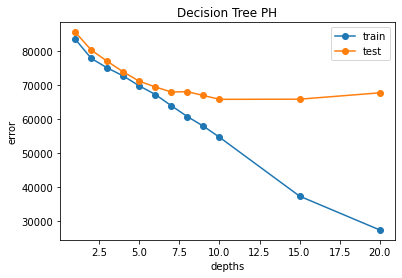

In [64]:
# PH
depths = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20]
utils.decision_tree('Decision Tree PH', depths, X_train_ph, X_test_ph, Y_train_ph, Y_test_ph)

Para PH, la mejor profundidad para predecir es 7.

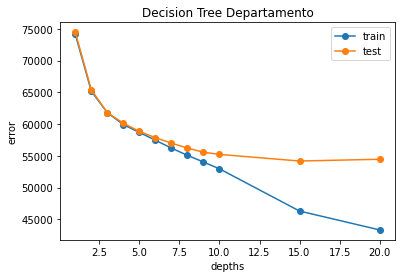

In [65]:
# Departamento
depths = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20]
utils.decision_tree('Decision Tree Departamento', depths, X_train_dpto, 
               X_test_dpto, Y_train_dpto, Y_test_dpto)

Para Deptos, la mejor profundidad para predecir es 10.

Err Train: 101399.73314919401
Err Test: 105946.97077583065


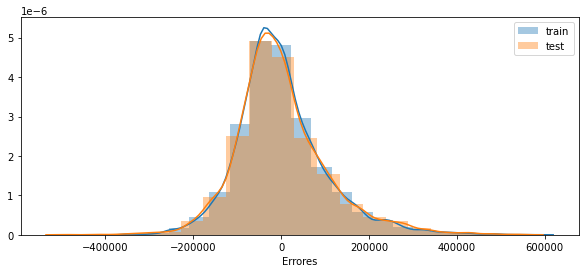

In [56]:
# Casa
dtregressor_casa = DecisionTreeRegressor(max_depth = 7, random_state = 42)
dtregressor_casa.fit(X_train_casa, Y_train_casa)
utils.rmse_graph(dtregressor_casa, X_train_casa, X_test_casa, Y_train_casa, Y_test_casa)

Err Train: 63923.18983199019
Err Test: 67973.88976828007


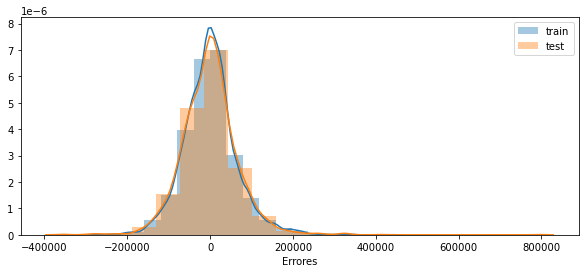

In [57]:
# PH
dtregressor_ph = DecisionTreeRegressor(max_depth = 7, random_state = 42)
dtregressor_ph.fit(X_train_ph, Y_train_ph)
utils.rmse_graph(dtregressor_ph, X_train_ph, X_test_ph, Y_train_ph, Y_test_ph)

Err Train: 55078.14271019452
Err Test: 56217.13185008224


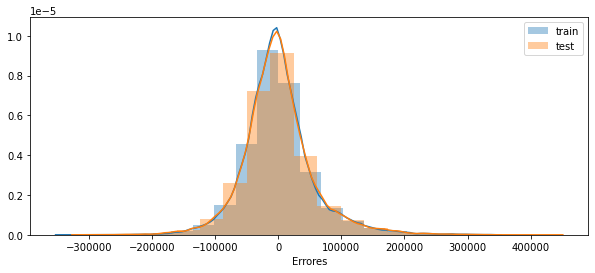

In [58]:
# Departamento
dtregressor_dpto = DecisionTreeRegressor(max_depth = 8, random_state = 42)
dtregressor_dpto.fit(X_train_dpto, Y_train_dpto)
utils.rmse_graph(dtregressor_dpto, X_train_dpto, 
                         X_test_dpto, Y_train_dpto, Y_test_dpto)